# **Gradient Descent: An Optimization Algorithm**

- Gradient Descent: https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

- For plotting: https://www.geogebra.org/m/DRfuvhxR 

Gradient Descent is an **optimization algorithm** used in machine learning and deep learning to minimize a loss function by iteratively updating model parameters (weights and biases). It helps models learn by reducing the difference between predictions and actual values.

---

## **1. Understanding Gradient Descent**
Gradient Descent works by computing the **gradient (derivative)** of the loss function and moving in the direction that **minimizes the loss**. \
For a function $J(W)$ that depends on a parameter $W$:

$$
W := W - \alpha \frac{\partial J}{\partial W}
$$

Where:
- $W$= Model parameter (weight or bias)
- $\alpha$ = Learning rate (step size)
- $\frac{\partial J}{\partial W}$ = Gradient (slope) of the loss function $J$.

---

## **2. Types of Gradient Descent**
There are three main types of Gradient Descent:

### **1. Batch Gradient Descent**
- Computes the gradient using **all training samples** in each step.
- More stable but computationally expensive for large datasets.
- **Update rule**:

  $$
  W := W - \alpha \frac{1}{m} \sum_{i=1}^{m} \frac{\partial J_i}{\partial W}
  $$

### **2. Stochastic Gradient Descent (SGD)**
- Updates weights **for each sample** instead of the entire dataset.
- Faster but noisier, leading to fluctuations.
- **Update rule**:

  $$
  W := W - \alpha \frac{\partial J_i}{\partial W}
  $$

### **3. Mini-Batch Gradient Descent**
- Uses a **subset (mini-batch) of data** to compute the gradient.
- Balances **speed and stability**.
- **Update rule**:

  $$
  W := W - \alpha \frac{1}{batch\_size} \sum_{i \in batch} \frac{\partial J_i}{\partial W}
  $$

---

## **3. Choosing the Right Learning Rate**
The **learning rate $\alpha$** controls how much the model updates the weights:

✅ **Too small** → Slow convergence.  
❌ **Too large** → May overshoot the optimal point or diverge.  

Choosing a good learning rate is **crucial for efficient training**.

Note::= symbol is called the Walrus Operator in Python. It is used for assignment expressions,

<p align="center">
  <img src=".\images\learningRate.PNG" width="500">
</p>


### Gradient Descent
With the above gradient $J'(w,b)$, we use a technique called gradient descent to minimse the error. If we have a parabolic cost function and we initilise our weight and bias at certain point. than we want to go in the direction of steepest descent. Steepest descent is also the gradeint, i/.e., we want to got ot the negative direction of gradient and do this iteratively to fing the minimum. For each iteration, we have update rule for new weight and new bias.

### Update Rules
$$w_{new} = w_{old} - \alpha \cdot dw $$

We subtract the value because we want to go in descent direction. $\alpha$ is the learning rate or step size. 

$$b_{new} = b_{old} - \alpha \cdot db $$
$$\frac{dJ}{dw}=dw = \frac{1}{N}\sum_{i=1}^{N}- 2x_i (y_i - (wx_i+b)) =  \frac{1}{N}\sum_{i=1}^{N}- 2x_i (y_i - \hat{y}) = \frac{1}{N}\sum_{i=1}^{N}- 2x_i (\hat{y} - y_i)$$

$$\frac{dJ}{db} = db = \frac{1}{N}\sum_{i=1}^{N}- 2(y_i - (wx_i+b)) =  \frac{1}{N}\sum_{i=1}^{N}- 2(y_i - \hat{y}) = \frac{1}{N}\sum_{i=1}^{N}- 2(\hat{y} - y_i)$$

#### Learning rate
$\alpha$ is the learning rate or step size. 

In [ ]:
# Example: Implementing Gradient Descent in Python**
# Below is a **simple implementation of Gradient Descent** for **Linear Regression** in **PyTorch**:

import torch
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]], dtype=torch.float32)
y = torch.tensor([[2.0], [4.1], [5.9], [8.2], [9.8]], dtype=torch.float32)  # Slight noise added

# Initialize weight and bias
W = torch.randn(1, requires_grad=True)  # Random weight
b = torch.randn(1, requires_grad=True)  # Random bias

# Define learning rate and epochs
alpha = 0.01
epochs = 100

# Store updates for visualization
W_history = []
b_history = []

# Training loop
for epoch in range(epochs):
    y_pred = W * X + b  # Linear model
    loss = ((y_pred - y) ** 2).mean()  # Mean Squared Error loss

    loss.backward()  # Compute gradients

    with torch.no_grad():  # Update weights without tracking gradients
        W -= alpha * W.grad
        b -= alpha * b.grad

        # Store the values for plotting
        W_history.append(W.item())
        b_history.append(b.item())

        W.grad.zero_()  # Reset gradients to zero
        b.grad.zero_()

    # Print loss every 20 epochs
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, W: {W.item():.4f}, b: {b.item():.4f}")

# Final predictions after training
with torch.no_grad():
    y_final_pred = W * X + b

# Plot training updates
plt.figure(figsize=(10, 5))

# 1. Plot regression line updates
plt.subplot(1, 2, 1)
for i in range(0, len(W_history), 10):  # Plot every 10 epochs
    y_plot = W_history[i] * X + b_history[i]
    plt.plot(X.numpy(), y_plot.numpy(), linestyle='dashed', alpha=0.5, label=f"Epoch {i}")

plt.scatter(X.numpy(), y.numpy(), color='blue', label="Actual Data")
plt.plot(X.numpy(), y_final_pred.numpy(), color='red', linewidth=2, label="Final Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Gradient Descent Updates")
plt.legend()

# 2. Plot loss reduction
plt.subplot(1, 2, 2)
plt.plot(range(epochs), [(W_history[i] - 1)**2 + (b_history[i] - 0)**2 for i in range(epochs)], color='green')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Reduction Over Time")

plt.tight_layout()
plt.show()


# Gradient Descent using Excel

Let's play with gradient descent.

https://uclaacm.github.io/gradient-descent-visualiser/

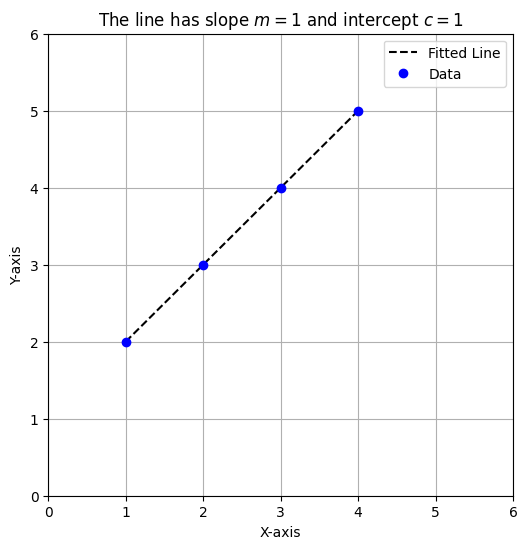

In [20]:
import matplotlib.pyplot as plt
X = [1, 2, 3, 4]
Y = [2, 3, 4 ,5]

# Create the plot
plt.figure(figsize=(6, 6))  # Make the figure square
plt.plot(X, Y, '--k', label="Fitted Line")  # Convert tensors to numpy for plotting
plt.plot(X, Y, 'ob', label="Data")  # Convert tensors to numpy for plotting
plt.xlabel("X-axis");plt.ylabel("Y-axis");
plt.xlim([0,6]);plt.ylim([0,6])
plt.title("The line has slope $m=1$ and intercept $c=1$")
#plt.axis("equal") 
plt.grid(True)
plt.legend()
plt.show()

Perform linear regression to obtain $m$ and $c$ using gradient descent.

true Data = $x_i$ \
True Value/labels = $y_i$ \
Prediction = $\hat{y_i}=mx_i + c$ \
MSE Loss: $Loss =   \frac{1}{4}\sum(y_i - \hat{y_i})^2 =  \frac{1}{4}\sum(y_i -(mx_i + c))^2$ \
$=\frac{1}{4}\sum[y_i^2 -2my_i x_i - 2y_i c + m^2 x_i^2 + c^2 + 2mcx_i]$ \
$=\frac{1}{4} (\sum y_i^2 -2m \sum y_i x_i - 2c \sum y_i + m^2 \sum x_i^2 + c^2 + 2mc\sum x_i)$\
$\frac{\partial loss}{\partial m} =  \frac{1}{4} (-2\sum _i x_i y_i + 2m \sum x_i^2 +2c\sum x_i)$ \
$\frac{\partial loss}{\partial c} =  \frac{1}{4} (-2\sum _i y_i + 8c + 2m\sum x_i)$ \
From given $X=[1,2,3,4]$ and $Y=[2,3,4,5]$ find \
$XY = [2, 6, 12, 20]$, $X^2=[1,4,9,16]$, $\sum x_i^2=30$, $\sum x_i=10$, $\sum y_i=14$, $\sum x_i y_i=40$ \
Therefore \
$\frac{\partial loss}{\partial m} =  \frac{1}{4} (-80 +60m +20c) = 15m +5c -20$ \
$\frac{\partial loss}{\partial c} =  \frac{1}{4} (-28+8c+20m) = 5m +2c -7$ 

Now apply gradeint descent to update the model parameter $m$ and $c$
$\theta = (m,c)$ \
$\nabla_\theta L = (\frac{\partial loss}{\partial m}, \frac{\partial loss}{\partial c})$ \
$\nabla_\theta L = (15m +5c -20,5m +2c -7)$ \
Update \
$m \leftarrow m - \eta \frac{\partial loss}{\partial m}$ \
$c \leftarrow c - \eta \frac{\partial loss}{\partial c}$ 

Say, $eta = 0.1$, start with random $m_0$ and $c_0$ say $m=0$ and $c=0$ and perform computation in excel sheet

## 🎉 **Thank You!** 🙌  
### 🚀 Happy Coding & Keep Learning! 💡

## <span style="color: yellow;">We will see the Backpropagation with detailed theory and example in next notebook</span>